# Galaxy classification
This is a ML code that performs galaxy classification using user-defined labels from the Galaxy-Zoo (http://zoo1.galaxyzoo.org/) project. 

The steps are the following: <br>
1. Import libraries and sample
2. Split sub-samples (training, validation, testing)
3. Fit with various classifier and check performance
4. Compare various classifiers in testing sample

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import datasets, utils, metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.simplefilter('ignore')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


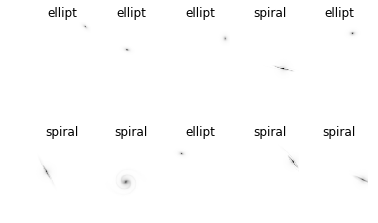

In [2]:
# Here we are going to use astropy to read fits images and convert them into 
# similar format matrices
# you can also use np.matrix.flatten to flatten a matrix into a single line
import glob
files = glob.glob("/Users/TB/Downloads/GALFITv2/*.npy")
galaxies = np.array([np.load(i) for i in files])
labels = [file.split("_")[0].replace('/Users/TB/Downloads/GALFITv2/','') for file in files]

# Display some example images of galaxies
images_and_labels = list(zip(galaxies, labels))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(galaxies)
data = galaxies.reshape((n_samples, -1))

# Normalize values to maximum and setting low values to 0
for i in range(len(data)):
    data[i] = data[i] / max(data[i])

# data[data < 0.001] = 0
        
# Shuffle the samples
shuffled_indexes = np.arange(len(galaxies))
np.random.shuffle(shuffled_indexes)

data = data[shuffled_indexes]
labels = list(np.array(labels)[shuffled_indexes])

In [3]:
# Splitting in training, validation, and test samples
data_train = data[:8 * n_samples // 10] # i.e. 80% training
labels_train = labels[:8 * n_samples // 10]

data_valid = data[8 * n_samples // 10:9 * n_samples // 10] # i.e. 10% validation (80->90%)
labels_valid = labels[8 * n_samples // 10:9 * n_samples // 10]

data_test = data[9 * n_samples // 10:] # i.e. 10% testing (90->100%)
labels_test = labels[9 * n_samples // 10:]

## 1) Using scikit-learn / SVM classifier
We are going to test the performance of a classical Support Vector Machines classifier

In [4]:
# Classifier
model_svc = LinearSVC()
model_svc.fit(data_train, labels_train)

# Comparisong with prediction
predicted = model_svc.predict(data_valid)

print("Classification report for %s:\n%s\n"
      % (model_svc, metrics.classification_report(labels_valid, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, predicted))

Classification report for LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

     ellipt       0.88      0.98      0.93       303
     spiral       0.99      0.94      0.97       697

avg / total       0.96      0.95      0.96      1000


Confusion matrix:
[[297   6]
 [ 39 658]]


## 2) Using scikit-learn / LogisticRegression classifier

In [5]:
# Classifier
model_lrc = LogisticRegression()
model_lrc.fit(data_train, labels_train)

# Comparisong with prediction
predicted = model_svc.predict(data_valid)

print("Classification report for %s:\n%s\n"
      % (model_lrc, metrics.classification_report(labels_valid, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, predicted))

Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

     ellipt       0.88      0.98      0.93       303
     spiral       0.99      0.94      0.97       697

avg / total       0.96      0.95      0.96      1000


Confusion matrix:
[[297   6]
 [ 39 658]]


## 3) Using scikit-learn / Multilayer perceptron classifier
We are going to use a simple Neural Network (Multilayer perceptron) classifier.

In [6]:
# Classifier
model_MLP = MLPClassifier()
model_MLP.fit(data_train, labels_train)

# Comparisong with prediction
predicted = model_MLP.predict(data_valid)

print("Classification report for %s:\n%s\n"
      % (model_MLP, metrics.classification_report(labels_valid, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, predicted))

Classification report for MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False):
             precision    recall  f1-score   support

     ellipt       0.92      0.99      0.96       303
     spiral       1.00      0.96      0.98       697

avg / total       0.97      0.97      0.97      1000


Confusion matrix:
[[301   2]
 [ 26 671]]


## 4) Using scikit learn / RandomForests
We are using a a scikit-learn bagging classifier.

In [7]:
# Classifier
model_RF = RandomForestClassifier()
model_RF.fit(data_train, labels_train)

# Comparisong with prediction
predicted = model_RF.predict(data_valid)

print("Classification report for %s:\n%s\n"
      % (model_RF, metrics.classification_report(labels_valid, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, predicted))

Classification report for RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

     ellipt       0.98      0.99      0.98       303
     spiral       1.00      0.99      0.99       697

avg / total       0.99      0.99      0.99      1000


Confusion matrix:
[[300   3]
 [  7 690]]


## 5) Using Keras simple Neural Network classifier
We are using a simple multilayer perceptron classifier.

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras import regularizers
from keras import optimizers
from keras.layers import Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [30]:
# Normalizing data to 0-1 range
# data = data / np.max(data[:])

num_pixels = data_train.shape[1] 

# It is good practice to use a one hot encoding 
# of the class values (ellip, spiral), to tranform
# the vector of class integers into a binary matrix.
int_enc = LabelEncoder()
labels_train_int = int_enc.fit_transform(labels_train)
labels_valid_int = int_enc.fit_transform(labels_valid)
labels_test_int = int_enc.fit_transform(labels_test)

oh_enc = OneHotEncoder(sparse=False)
labels_train_int = labels_train_int.reshape(len(labels_train_int), 1)
labels_train_ohe = oh_enc.fit_transform(labels_train_int)
labels_valid_int = labels_valid_int.reshape(len(labels_valid_int), 1)
labels_valid_ohe = oh_enc.fit_transform(labels_valid_int)
labels_test_int = labels_test_int.reshape(len(labels_test_int), 1)
labels_test_ohe = oh_enc.fit_transform(labels_test_int)

# uniques, labels_valid = np.unique(labels_valid, return_inverse=True)
# labels_train_cat = np_utils.to_categorical(labels_train)
# labels_valid_cat = np_utils.to_categorical(labels_valid)
num_classes = labels_valid_ohe.shape[1]

In [35]:
# Define the model
def baseline_model():
    # create model
    sgd = optimizers.SGD(lr=0.1)
    model_Ker = Sequential()
#     model_Ker.add(Dropout(0.2, input_shape=(num_pixels,)))
    model_Ker.add(Dense(num_pixels // 3, input_dim=num_pixels, kernel_initializer='normal',activation='relu'))
#     model_Ker.add(Dense(num_pixels // 5, input_dim=num_pixels, kernel_initializer='normal',activation='relu'))
                                          #kernel_regularizer=regularizers.l1(0.1)))
    model_Ker.add(Dropout(0.2))
    model_Ker.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model_Ker.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
    return model_Ker

# Build the model
model_Ker = baseline_model()

In [36]:
# Fit the model
history_fit = model_Ker.fit(data_train, labels_train_ohe, validation_data=(data_valid, labels_valid_ohe), 
                                            epochs=15, batch_size=500, verbose=2)

# Comparisong with prediction
predicted = model_Ker.predict(data_valid)

Train on 8000 samples, validate on 1000 samples
Epoch 1/15
 - 35s - loss: 0.2215 - acc: 0.6804 - val_loss: 0.1877 - val_acc: 0.6970
Epoch 2/15
 - 35s - loss: 0.1908 - acc: 0.7179 - val_loss: 0.1637 - val_acc: 0.8870
Epoch 3/15
 - 33s - loss: 0.1696 - acc: 0.7669 - val_loss: 0.1857 - val_acc: 0.6970
Epoch 4/15
 - 32s - loss: 0.1552 - acc: 0.8039 - val_loss: 0.1364 - val_acc: 0.7160
Epoch 5/15
 - 32s - loss: 0.1376 - acc: 0.8285 - val_loss: 0.1764 - val_acc: 0.6970
Epoch 6/15
 - 32s - loss: 0.1399 - acc: 0.8176 - val_loss: 0.0949 - val_acc: 0.9320
Epoch 7/15
 - 33s - loss: 0.1080 - acc: 0.8889 - val_loss: 0.0923 - val_acc: 0.9720
Epoch 8/15
 - 32s - loss: 0.1058 - acc: 0.8701 - val_loss: 0.1012 - val_acc: 0.9420
Epoch 9/15
 - 32s - loss: 0.1099 - acc: 0.8491 - val_loss: 0.0729 - val_acc: 0.9840
Epoch 10/15
 - 34s - loss: 0.0874 - acc: 0.9141 - val_loss: 0.0817 - val_acc: 0.9610
Epoch 11/15
 - 35s - loss: 0.0796 - acc: 0.9337 - val_loss: 0.0642 - val_acc: 0.9850
Epoch 12/15
 - 33s - loss:

In [37]:
# Reverse one hot encoding
pred = int_enc.inverse_transform(predicted.argmax(1))

print("Classification report for %s:\n%s\n"
      % (model_Ker, metrics.classification_report(labels_valid, pred)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(labels_valid, pred))

Classification report for <keras.engine.sequential.Sequential object at 0x149475390>:
             precision    recall  f1-score   support

     ellipt       0.98      0.99      0.99       303
     spiral       1.00      0.99      0.99       697

avg / total       0.99      0.99      0.99      1000


Confusion matrix:
[[301   2]
 [  7 690]]


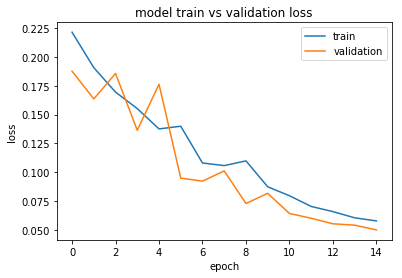

In [38]:
plt.plot(history_fit.history['loss'])
plt.plot(history_fit.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

Trials to find the optimal setup for the model:
- 10 epochs, batch=500, 1 hidden layer, (relu, sigmoid) activations => reached precision 92, recall 91 
- 10 epochs, batch=500, 1 hidden layer, dropout=0.2 at the initial layer, (relu, sigmoid) activations => reached precision 90, recall 84 
- 10 epochs, batch=500, 1 hidden layer, dropout=0.2 at the hidden layer, (relu, sigmoid) activations => reached precision 97, recall 97 
- 15 epochs, batch=500, 1 hidden layer, dropout=0.2 at the hidden layer, (relu, sigmoid) activations => reached precision 99, recall 99 

(Larger batch size and dropout make the model significantly faster)

## Final check 
Here we are using the test sample for a final check of the various algorithms used above. We check if their performance is as good as it is reported in the validation process.

In [41]:
print("====================================================================================")
# Predictions for SVM
predicted = model_svc.predict(data_test)
print("Classification report for %s:\n%s\n"
      % (model_svc, metrics.classification_report(labels_test, predicted)))
print("Confusion matrix:\n%s \n" % metrics.confusion_matrix(labels_test, predicted))
print("====================================================================================")

# Predictions for LogisticRegression
predicted = model_lrc.predict(data_test)
print("Classification report for %s:\n%s\n"
      % (model_lrc, metrics.classification_report(labels_test, predicted)))
print("Confusion matrix:\n%s \n" % metrics.confusion_matrix(labels_test, predicted))
print("====================================================================================")

# Predictions for MLP
predicted = model_MLP.predict(data_test)
print("Classification report for %s:\n%s\n"
      % (model_MLP, metrics.classification_report(labels_test, predicted)))
print("Confusion matrix:\n%s \n" % metrics.confusion_matrix(labels_test, predicted))
print("====================================================================================")

# Predictions for RandomForests
predicted = model_RF.predict(data_test)
print("Classification report for %s:\n%s\n"
      % (model_RF, metrics.classification_report(labels_test, predicted)))
print("Confusion matrix:\n%s \n" % metrics.confusion_matrix(labels_test, predicted))
print("====================================================================================")

# Predictions for Keras Neural Network
predicted = model_Ker.predict(data_test)
pred = int_enc.inverse_transform(predicted.argmax(1))
print("Classification report for %s:\n%s\n"
      % (model_Ker, metrics.classification_report(labels_test, pred)))
print("Confusion matrix:\n%s \n" % metrics.confusion_matrix(labels_test, pred))
print("====================================================================================")

Classification report for LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0):
             precision    recall  f1-score   support

     ellipt       0.86      0.99      0.92       280
     spiral       0.99      0.94      0.96       720

avg / total       0.96      0.95      0.95      1000


Confusion matrix:
[[276   4]
 [ 46 674]] 

Classification report for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

     ellipt       0.90      0.97      0.94       280
     spiral       0.99      0.96      0.97       720

avg / total       0.96      0.96      0.96    

# Saving the trained models
Using pickle we can save the trained models to use them in a later time w/o the need to re-train them.

In [42]:
import pickle

# saving the models to disk
model_labels = ['SVC','LogReg','MLP','RandFor','KerNN']
models = ['model_SVC','model_LR','model_MLP','model_RF','model_Ker']

for modstr,model in zip(model_labels,models):
    pickle.dump(model, open('galaxy_classification_zoo_'+modstr+'.sav', 'wb'))

In [43]:
# To load the models at a later time:
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)
# print(result)